# Correlation

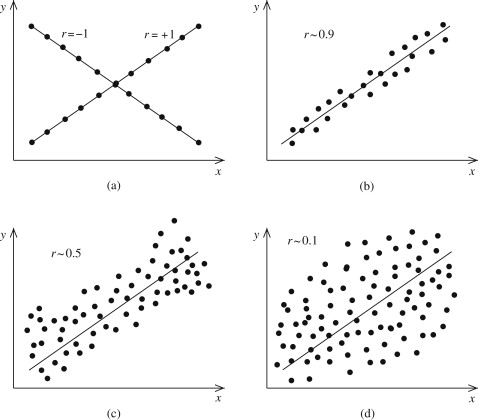

To select or create the most relevant features for the model, we can follow these steps:

1. Understand the problem: We need to have a clear understanding of the problem we are trying to solve and the data we have.

2. Explore the data: We need to explore the data to identify patterns, trends, and relationships between variables.

3. Feature selection: We can use various techniques such as correlation analysis, feature importance ranking, and principal component analysis (PCA) to select the most relevant features for the model.

4. Feature creation: We can also create new features by combining or transforming existing features to capture more information and improve the model's performance.

5. Test and refine: We should test the model with different combinations of features and evaluate its performance to identify the best set of features for the model.

In [131]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [132]:
df = pd.read_excel("StateCodeReduced.xlsx")

In [133]:
data.head()

,mw,code,temp,moisture,mvar,unit_no,mw_declare,Unnamed: 7,Unnamed: 8
0,95,SO,32,10.0,17.0,1,132,NaN,NaN
1,106,SO,43,6.0,25.0,1,132,NaN,NaN
2,118,LF1,26,10.0,43.0,3,132,NaN,NaN
3,122,LF1,39,7.0,43.0,3,148,NaN,NaN
4,120,SO,41,12.0,46.0,3,148,NaN,NaN


In [134]:
correlations = df.corr()
df.corr()['mw_declare'][0:6].abs().sort_values(ascending=False)

mw_declare    1.000000
unit_no       0.336532
mw            0.199083
temp          0.076215
mvar          0.033762
moisture      0.010247
Name: mw_declare, dtype: float64

# Feature importance ranking

In machine learning, feature importance ranking (FIR) refers to a task that measures contributions
of individual input features (variables) to the performance of a supervised learning model. FIR
has become one of powerful tools in explainable/interpretable AI to facilitate understanding of
decision-making by a learning system and discovery of key factors in a specific domain, e.g., in
medicine, what genes are likely main causes of a cancer.

There are several machine learning algorithms that can provide feature importance after training the model. Some of these algorithms include:

1. Decision trees and Random Forests: These algorithms can provide feature importance based on how much they contribute to reducing the impurity of the target variable.

2. Gradient Boosting Machines: This algorithm can provide feature importance based on how much they contribute to reducing the loss function.

3. Linear models: These models can provide feature importance based on the magnitude of the coefficients assigned to each feature.

4. Support Vector Machines: This algorithm can provide feature importance based on how much they contribute to defining the optimal hyperplane.

5. Neural Networks: These models can provide feature importance based on the weights assigned to each input feature.

6. XGBoost: This algorithm can provide feature importance based on the number of times a feature is used to split the data across all trees.

These methods can be used to identify the most important features for a given problem and help in selecting the relevant features for improving the performance of machine learning models.

In [139]:
X = data[["moisture","unit_no","temp","mw"]]
y = data[["mw_declare"]]

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [141]:
# Training the Decision Tree Regression model on the train dataset with default hyperparameters
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
rf.feature_importances_

array([0.20061149, 0.43599699, 0.19122242, 0.1721691 ])

# PCA

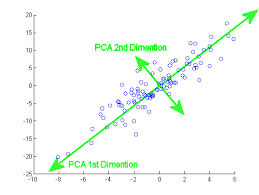

PCA (Principal Component Analysis) is a statistical technique used for dimensionality reduction. It helps to identify patterns and relationships in high-dimensional datasets by transforming the original features into a new set of uncorrelated variables called principal components.

The main difference between PCA and correlation analysis using the corr() method is that PCA considers all the features simultaneously and finds the directions of maximum variance in the data, while correlation analysis only measures the pairwise linear relationship between two variables.

To perform PCA in Python, we can use the PCA class from the sklearn.decomposition module.
Here is some sample code to perform PCA and find the number of components when we consider 90% of variance:

In [128]:
X = data[["mw","temp","moisture","mvar","mw_declare","unit_no"]]
y = data["code"]

In [129]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [130]:
# Find the number of components when we consider 90% of variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance_ratio >= 0.9) + 1
print('Number of components:', num_components)

Number of components: 3


 In this code, we first load the dataset from a CSV file and perform PCA using the PCA class. Then, we calculate the cumulative explained variance ratio for each component and find the number of components when we consider 90% of variance.
 The argmax() function returns the index of the first element that satisfies the condition, and we add 1 to get the actual number of components. Finally, we print the number of components.

# Difference between feature selection and dimensionality reduction

there is a difference between feature selection and dimensionality reduction. Feature selection is the process of selecting a subset of relevant features from the original set of features, while dimensionality reduction is the process of transforming the original features into a lower-dimensional space while preserving the most important information.

In other words, feature selection aims to identify the most important features for a given problem, while dimensionality reduction aims to reduce the number of features without losing important information.

Both techniques can be used to improve the performance of machine learning models by reducing the complexity of the data and removing irrelevant or redundant features. However, feature selection is often preferred when the number of features is relatively small and there are clear indications of which features are relevant, while dimensionality reduction is more suitable when dealing with high-dimensional datasets where it is not clear which features are most important.